<a href="https://colab.research.google.com/github/PalakAggarwal13/MachineLearning/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"] = (df["class"]=="g").astype(int)

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


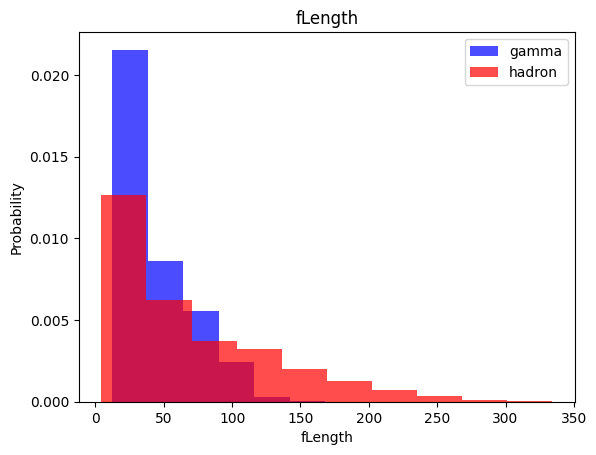

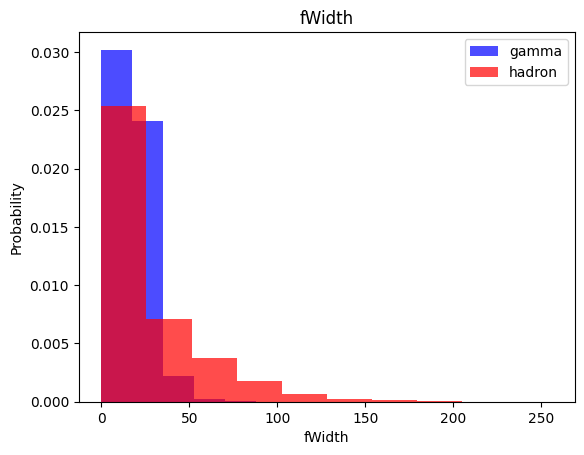

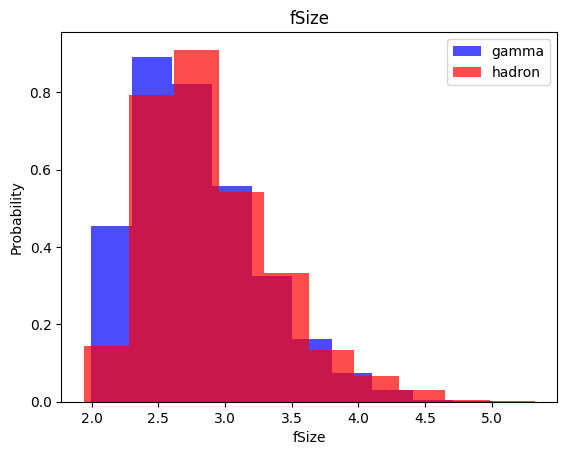

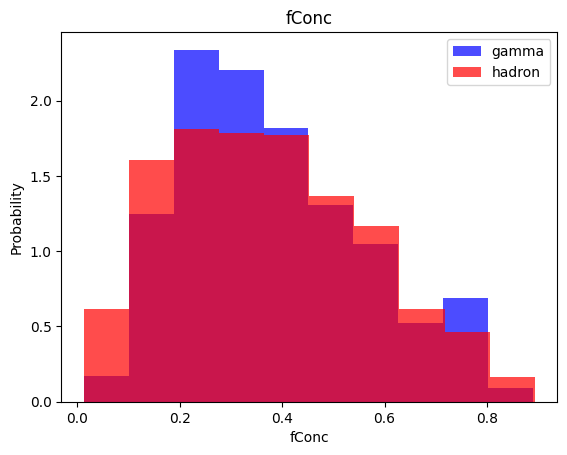

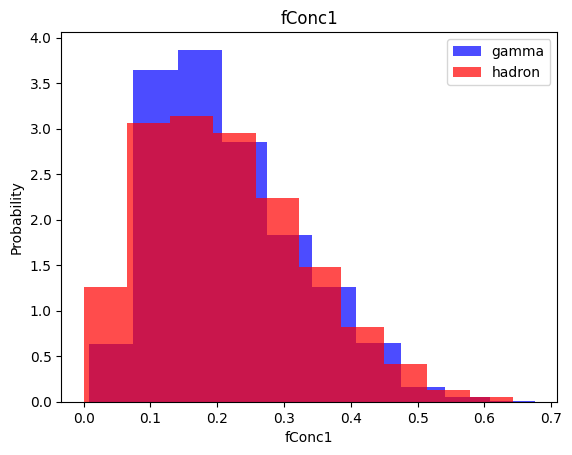

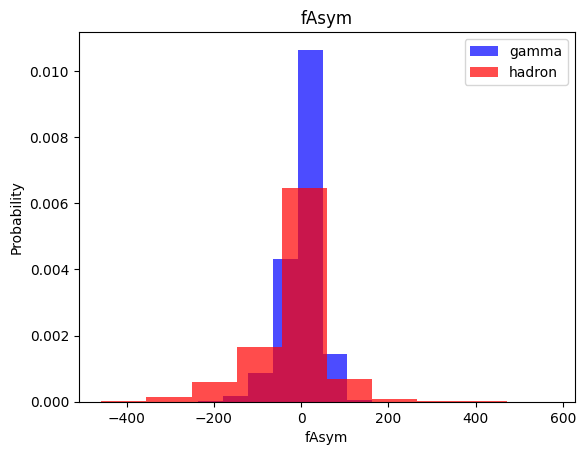

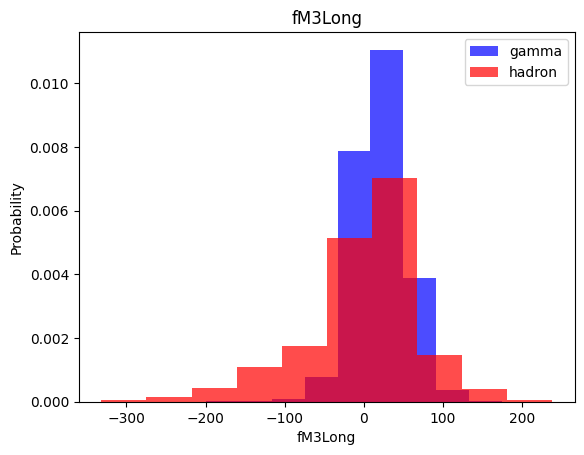

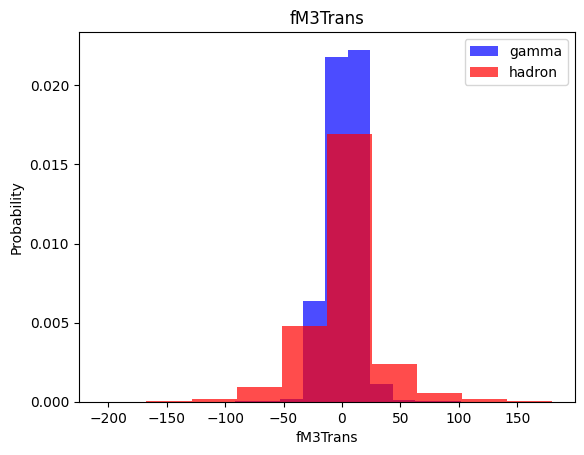

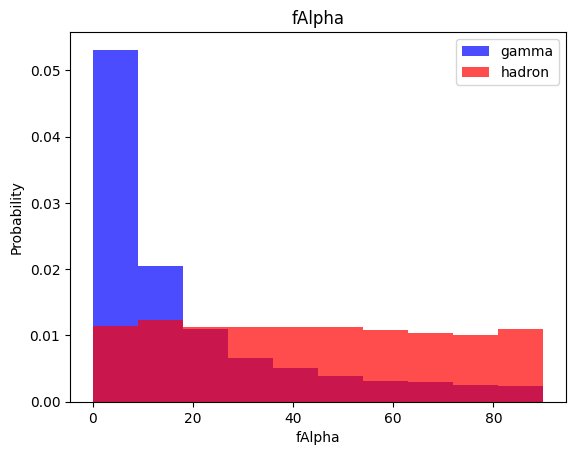

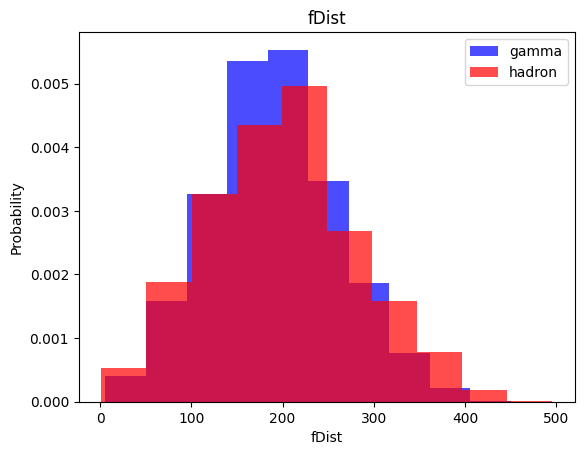

In [11]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],label="gamma",color="blue",alpha=0.7,density=True),
  plt.hist(df[df["class"]==0][label],label="hadron",color="red",alpha=0.7,density=True),
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

# ***TRAIN , VALIDATION , TEST DATASET***

In [103]:
train , valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def scale_params(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X,y = ros.fit_resample(X,y)

    data = np.hstack((X , np.reshape(y , (-1,1))))
    return data , X , y

In [16]:
print(len(train[train[:,-1]==1]))   #gamma
print(len(train[train[:,-1]==0]))   #hadron

7391
7391


In [104]:
train , X_train , y_train = scale_params(train,oversample=True)
val , X_val , y_val = scale_params(valid,oversample=False)
test , X_test , y_test = scale_params(test,oversample=False)

In [17]:
len(X_train)

14782

In [18]:
sum(y_train == 1)

np.int64(7391)

In [19]:
sum(y_train == 0)

np.int64(7391)

## ***K Nearest Neighbors***

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [24]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1332
           1       0.86      0.86      0.86      2472

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# **KNN Manual Implementation**


In [26]:
from collections import Counter

In [27]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [28]:
def fit_knn(X_train,y_train):
  return X_train,y_train

In [29]:
def predict_one(X_train,y_train,x_test,k):
  distances = [euclidean_distance(x_test, x) for x in X_train]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

In [30]:
def predict_knn(X_train,y_train,X_test,k=3):
  return np.array([predict_one(X_train,y_train,x,k) for x in X_test])

In [31]:
X_train_stored, y_train_stored = fit_knn(X_train[:100], y_train[:100])
predictions = predict_knn(X_train_stored, y_train_stored, X_test[:100], k=3)
print("Predictions:", predictions)

Predictions: [1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [32]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34        42
           1       0.62      0.90      0.73        58

    accuracy                           0.62       100
   macro avg       0.62      0.57      0.54       100
weighted avg       0.62      0.62      0.57       100



# ***NAIVE BAYES***

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [35]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1332
           1       0.74      0.91      0.82      2472

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804



# ***NAIVE BAYES MANUAL IMPLEMENTATION***

In [36]:
def gaussian_pdf(x,mean,var):
  eps = 1e-6
  coeff = 1 / np.sqrt(2.0 * np.pi * var + eps)
  exponent = np.exp(-((x-mean)**2)/(2 * var + eps))
  return coeff * exponent

In [37]:
def summarize_by_class(X,y):
  summaries={}
  labels = np.unique(y)
  for c in labels:
    X_c = X[y==c]
    summaries[c] = {
        "mean" : X_c.mean(axis=0),
        "variance" : X_c.var(axis=0),
        "prior" : X_c.shape[0]/X.shape[0]
    }
  return summaries

In [38]:
def calculate_class_probabilities(summaries,x):
  probs = {}
  for c , stats in summaries.items():
    prior = stats["prior"]
    likelihoods = gaussian_pdf(x,stats["mean"],stats["variance"])
    total_likelihoods = np.prod(likelihoods)
    probs[c] = prior * total_likelihoods
  return probs

In [39]:
def predict_one(summaries,x):
  probs = calculate_class_probabilities(summaries,x)
  return max(probs,key=probs.get)

In [40]:
def predict_nb(X_train,y_train,X_test):
    summaries = summarize_by_class(X_train,y_train)
    return np.array([predict_one(summaries,x) for x in X_test])

In [41]:
predictions = predict_nb(X_train[:100],y_train[:100],X_test[:100])
print("Predictions:",predictions)

Predictions: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [42]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.78      0.33      0.47        42
           1       0.66      0.93      0.77        58

    accuracy                           0.68       100
   macro avg       0.72      0.63      0.62       100
weighted avg       0.71      0.68      0.64       100



# **LOGISTIC REGRESSION**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [45]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1332
           1       0.84      0.83      0.84      2472

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# **LOGISTIC REGRESSION MANUAL IMPLEMENTATION**

In [46]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [47]:
def compute_cost(X,y,w,b):
  m = X.shape[0]
  eps = 1e-15
  z = np.dot(X,w)+b
  f_wb = sigmoid(z)
  cost = (-1/m )*(np.sum(y*np.log(f_wb+eps)+(1-y)*np.log(1-f_wb+eps)))
  return cost

In [61]:
def compute_gradient(X,y,w,b):
  m = X.shape[0]
  eps = 1e-15
  z = np.dot(X,w)+b
  f_wb = sigmoid(z)
  dJ_dw = (1/m) * np.dot((f_wb - y),X)
  dJ_db = (1/m) * (np.sum(f_wb - y))
  return dJ_dw , dJ_db

In [62]:
def train_logistic_regression(X,y,lr=0.01,num_iters=1000):
  n = X.shape[1]
  w = np.zeros(n)
  b = 0

  for i in range(num_iters):
    dJ_dw , dJ_db = compute_gradient(X,y,w,b)
    w -= lr * dJ_dw
    b -= lr * dJ_db

    if i%100==0:
      cost = compute_cost(X,y,w,b)
      print(f"Iteration {i}: Cost = {cost:.4f}")

  return w, b

In [63]:
def predict(X,w,b):
  probs = sigmoid(np.dot(X,w)+b)
  return (probs>=0.5).astype(int)

In [70]:
w, b = train_logistic_regression(X_train, y_train, lr=0.1, num_iters=1000)

Iteration 0: Cost = 0.6804
Iteration 100: Cost = 0.5022
Iteration 200: Cost = 0.4927
Iteration 300: Cost = 0.4900
Iteration 400: Cost = 0.4888
Iteration 500: Cost = 0.4882
Iteration 600: Cost = 0.4878
Iteration 700: Cost = 0.4875
Iteration 800: Cost = 0.4873
Iteration 900: Cost = 0.4872


In [71]:
preds = predict(X_test, w, b)
print("Predictions:", preds)

Predictions: [1 1 0 ... 1 1 0]


In [72]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1332
           1       0.84      0.83      0.84      2472

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# ***SUPPORT VECTOR MACHINES(SVM)***

In [74]:
from sklearn.svm import SVC

In [76]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [77]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1332
           1       0.89      0.89      0.89      2472

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# **SUPPORT VECTOR MACHINES (SVM) MANUAL IMPLEMENTATION**

In [87]:
def svm_train(X,y, learning_rate=0.01,lambda_param=0.01,epochs=1000):
  m , n = X.shape
  w = np.zeros(n)
  b = 0

  y_ = np.where(y <= 0 , -1 , 1)

  for epoch in range(epochs):
    for i in range(m):
      condition = y_[i] * ( np.dot( X[i] , w ) + b ) >= 1
      if condition:
        w -= learning_rate * (2 * lambda_param * w)
      else:
        w -= learning_rate * (2 * lambda_param * w - np.dot( X[i],y_[i] ))
        b -= learning_rate * y_[i]

  return w , b

In [88]:
def svm_predict(X, w, b):
    return np.where(np.dot(X, w) + b >= 0, 1, 0)

In [89]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0)
y = y.astype(int)

w, b = svm_train(X, y, learning_rate=0.001, lambda_param=0.01, epochs=1000)
predictions = svm_predict(X, w, b)

In [91]:
w, b = svm_train(X_train[:100], y_train[:100], learning_rate=0.001, lambda_param=0.01, epochs=1000)
predictions = svm_predict(X_test[:100], w, b)

In [92]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        42
           1       0.00      0.00      0.00        58

    accuracy                           0.42       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.42      0.25       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **NEURAL NETWORK IMPLEMENTATION**

In [93]:
import tensorflow as tf

In [120]:
def plot_history(history):
  fig , (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
  ax1.plot(history.history['loss'] , label='loss')
  ax1.plot(history.history['val_loss'] , label= 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'] , label='accuracy')
  ax2.plot(history.history['val_accuracy'] , label= 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [121]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

  history = nn_model.fit(
    X_train , y_train , epochs=epochs , batch_size=batch_size , validation_data=(X_val, y_val) , verbose=0
  )

  return nn_model , history

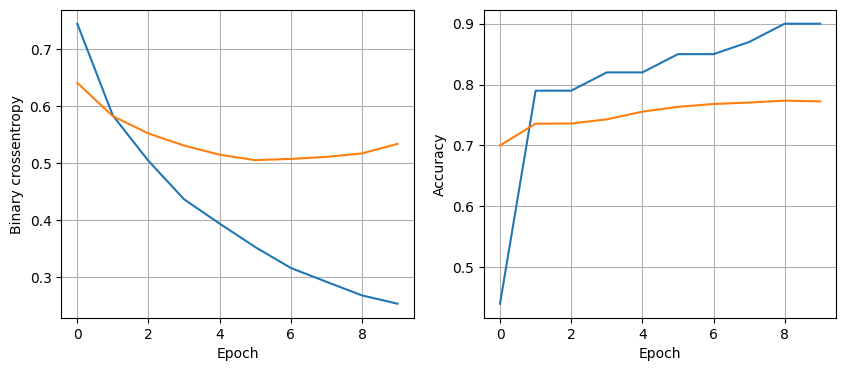

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7696 - loss: 0.5591 


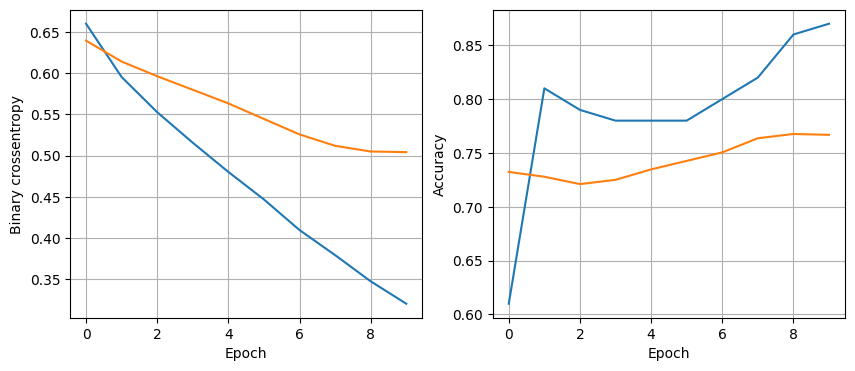

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7905 - loss: 0.5047 


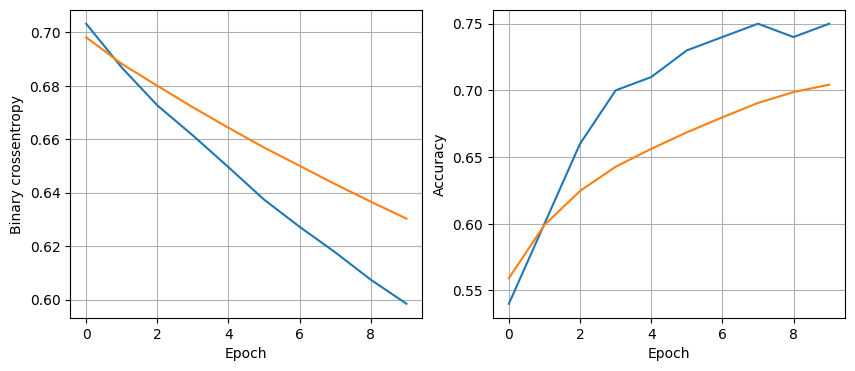

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7583 - loss: 0.6312 


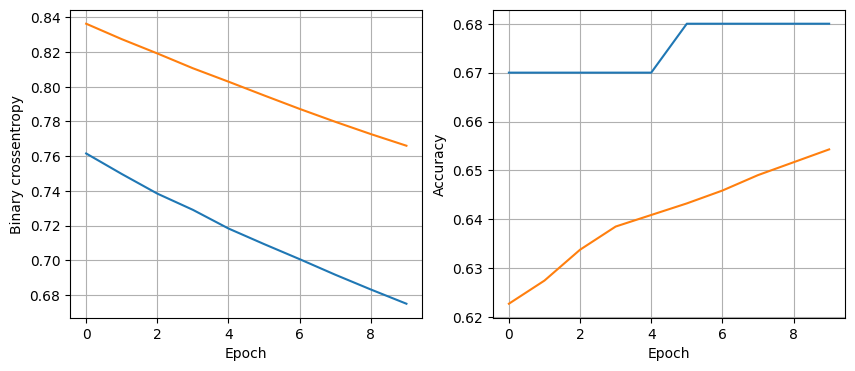

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 0.6874 


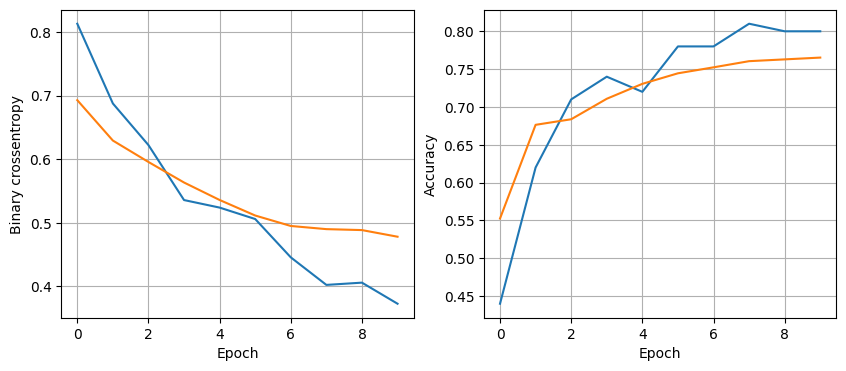

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7615 - loss: 0.4788 


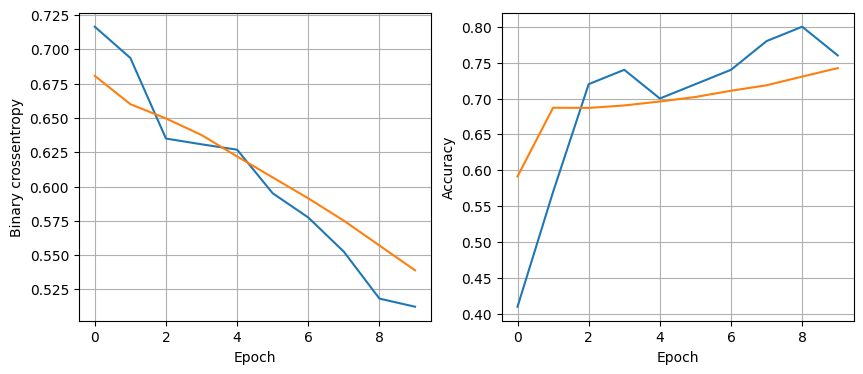

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7615 - loss: 0.5193 


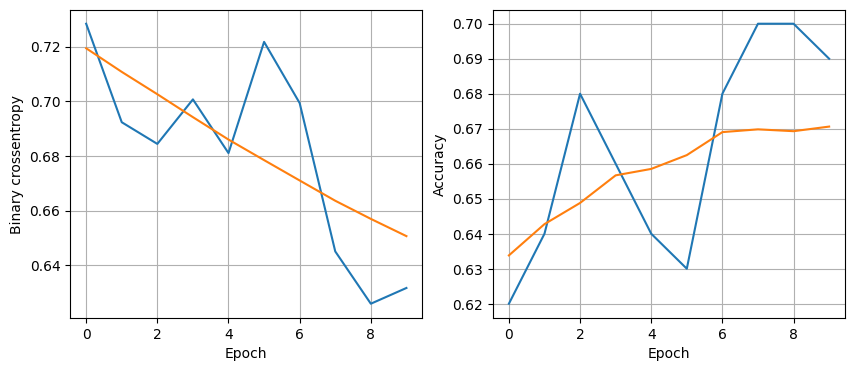

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7215 - loss: 0.6187


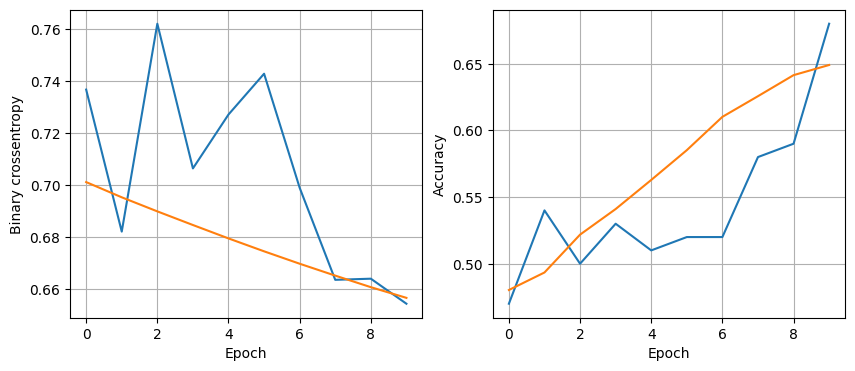

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5874 - loss: 0.6818


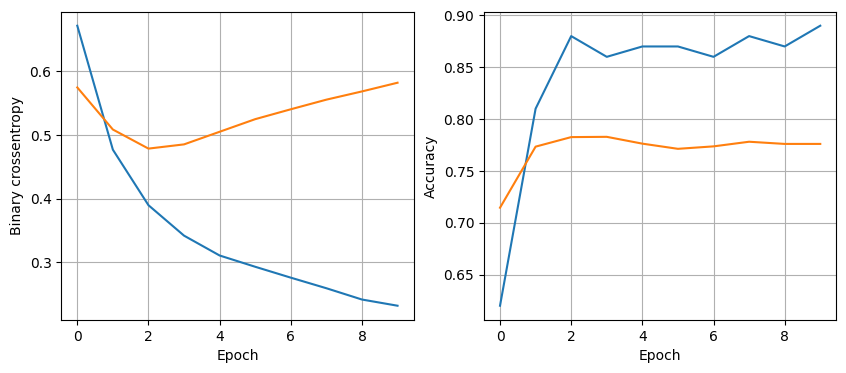

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.6097


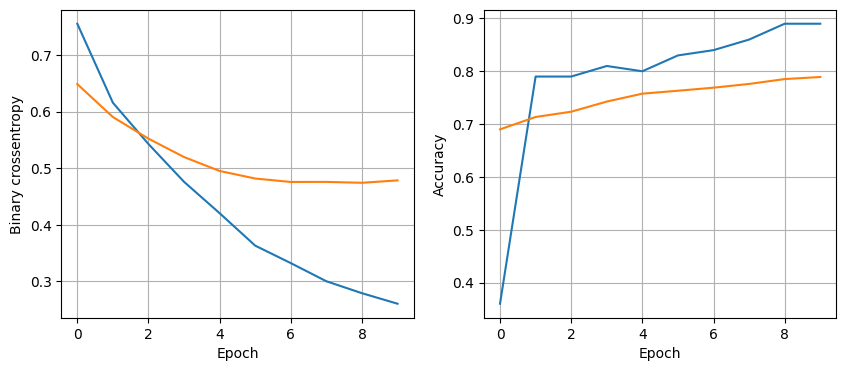

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7884 - loss: 0.5289


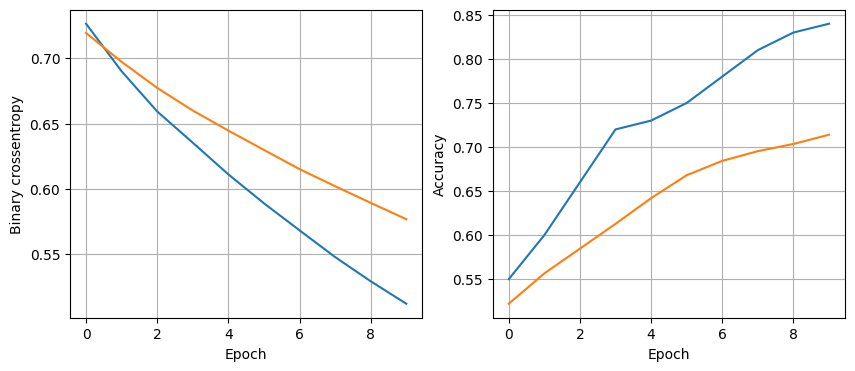

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7505 - loss: 0.5807 


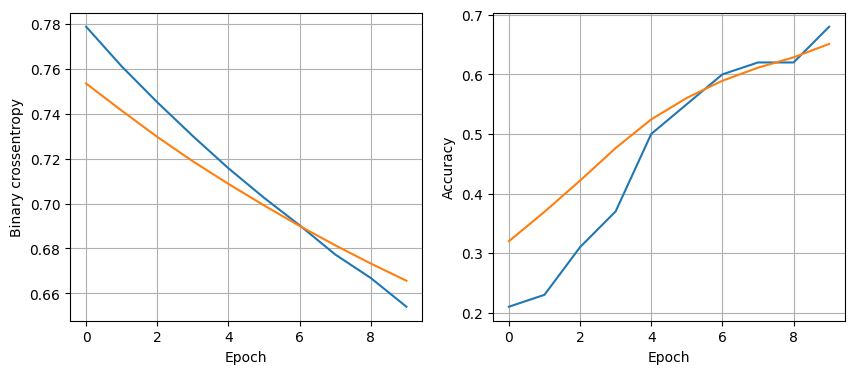

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6635 - loss: 0.6742


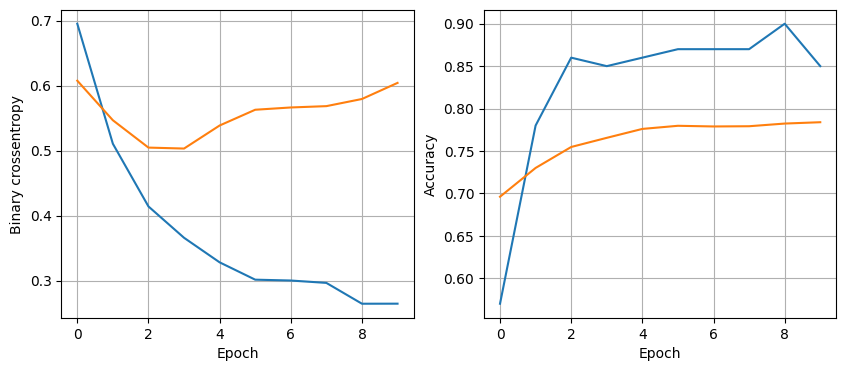

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8068 - loss: 0.6503 


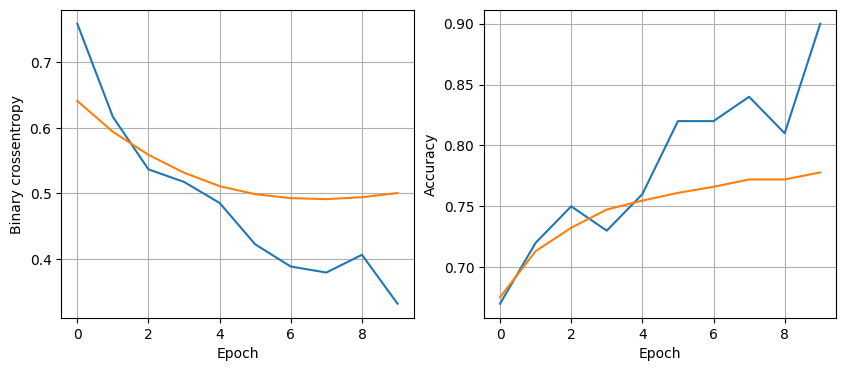

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7945 - loss: 0.5005


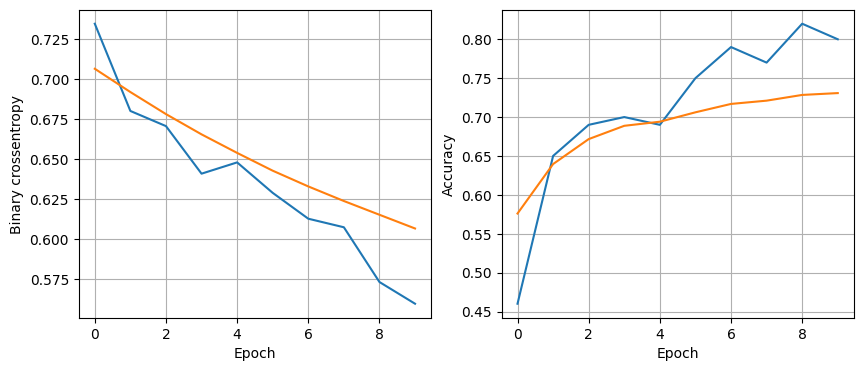

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7759 - loss: 0.5967


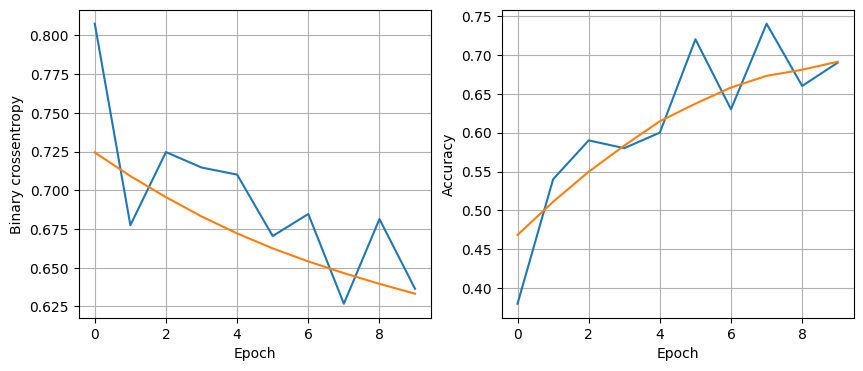

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7411 - loss: 0.6322


In [125]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 10
for num_nodes in [16,32]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.001]:
      for batch_size in [32,64]:
        model , history = train_model(X_train[:100],y_train[:100],num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_val[:100],y_val[:100])[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [126]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58      1343
           1       0.76      0.95      0.84      2461

    accuracy                           0.77      3804
   macro avg       0.79      0.70      0.71      3804
weighted avg       0.78      0.77      0.75      3804

